In [1]:
from datetime import datetime
import pandas as pd
import numpy as np


In [ ]:
playerCharDict = {
"CarlosChar":"Carlos",
"El_Don":"Carlos",
"Blood wolfy":"Carlos",
"Mein_Don":"Carlos",
"Dur Hero":"Carlos",
"Blood Wolf Bueno":"Carlos",
"Gelbin":"Carlos",
"LEGolASS":"Carlos",
"Legs":"Carlos",
"Razonixx":"Carlos",
"Ranni":"Carlos",
"Raphael":"Carlos",
"Raphaelf":"Carlos",
"Padre":"Carlos",
"Suwuner":"Carlos",
"Ros":"Carlos",
"Castiel":"Danny",
"Boiiii":"Danny",
"FINAL boii":"Danny",
"Lucius":"Danny",
"Radagon":"Danny",
"Radagon the vengeful":"Danny",
"Luffy":"Danny",
"Roger D. Gold":"Danny",
"Roger":"Danny",
"Monkey D. Kaido":"Danny",
"Twilight":"Danny",
"Ko":"Echegollen",
"Truj":"Echegollen",
"Truj Spellshot":"Echegollen",
"Trujh Spellshot":"Echegollen",
"A.R.C.S. Type B":"Echegollen",
"Groa":"Echegollen",
"Lizardo Lagartijo":"Frijol",
"Batholomeus Gingersnapp III":"Max",
"Muki":"Pau",
"Muky":"Pau",
"Monke":"Salva",
"Mr. Biscuit Oliva":"Salva",
"Shrigma Male":"Sebas",
"Shrigma":"Sebas",
"Gourd Leshy":"Sebas",
"Pinwheel de plantas":"Sebas",
"Pajaro":"Sebas",
"Svn":"Sebas",
"Jerma0":"Sebas",
"Gorod":"Sebas",
"Oso Guapo":"Sebas",
"Ylem":"Sebas",
"Melinoë":"Sebas",
"Vildhjarta":"Sebas",
"Thuja":"Sebas",
"Thuja 2":"Sebas",
"Schuldiner":"Sebas",
"Pnigalion":"Sebas",
"Ēostre":"Sebas",
"Somn":"Sebas",
"Fenriz":"Sebas"
}

In [ ]:
f = open("fvtt-log-Mon-Jul-18-2022.txt",encoding="utf8")

data = f.read()
data_list = data.split("---------------------------")
clean = []
characters = []
players = []
try:
    for i, item in enumerate(data_list):
        try:
            temp_list = item.split("\n")
            temp_list = list(filter(None, temp_list))
            roll_result = temp_list[1]
            found_action = temp_list[2].find("<strong>")
            try:
                if found_action < 0:
                    found_action = temp_list[2].find('<h4 class="action">')
                    if found_action < 0:
                        found_action = -1
                    else:
                        historicType = '<h4 class="action">'
                else:
                    historicType = "<strong>"
            except:
                found_action = -1
        except:
            found_action = -1
        if roll_result.isnumeric() and found_action>-1:
            dateString = temp_list[0][1:temp_list[0].index(",")]
            date = datetime.strptime(dateString,'%m/%d/%Y')
            character = temp_list[0][temp_list[0].index("]")+2:]
            if character in playerCharDict:
                player = playerCharDict[character]
            else:
                player = "JP god GM"
            if player not in players:
                players.append(player)
            if character not in characters:
                characters.append(character)
            if historicType == "<strong>":
                action = temp_list[2][temp_list[2].index("<strong>")+8:temp_list[2].index("</strong>")]
            elif historicType == '<h4 class="action">':
                if "</h4" not in temp_list[2]:
                    action = temp_list[2][temp_list[2].index('<b>')+3:temp_list[2].index("</b")]
                else:
                    action = temp_list[2][temp_list[2].index('<h4 class="action">')+19:temp_list[2].index("</h4")]
            if "strike" in action:
                actionGeneral = "strike"
            else:
                actionGeneral = "other"
            d20roll = temp_list[-1][temp_list[-1].index("=")+1:temp_list[-1].index("=")+4].strip()
            clean.append([character,player,roll_result,action,int(d20roll),date,actionGeneral])
        data_list[i] = temp_list
    df = pd.DataFrame(clean, columns= ["Character","Player", "Roll Result","Action","D20 Roll", "Date", "general"])
except Exception as e:
    print(dateString)
    print(date)
    print(character)
    print(action)
    print(temp_list[2][temp_list[2].index("<strong>")+8:temp_list[2].index("</strong>")])
    print(data_list[i])
    print("error in line " + str(i))
    print(e)


In [ ]:
data
df
dfStrike = df

In [ ]:
#df.to_csv('df.csv')

In [ ]:
#data_list

In [ ]:
import matplotlib.pyplot as plt
import statistics

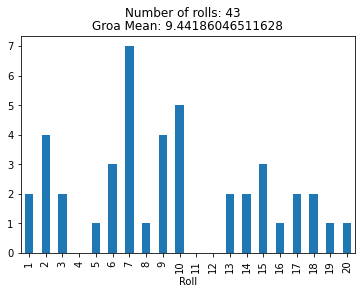

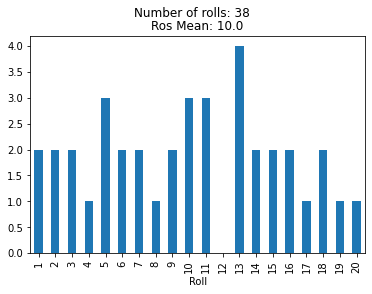

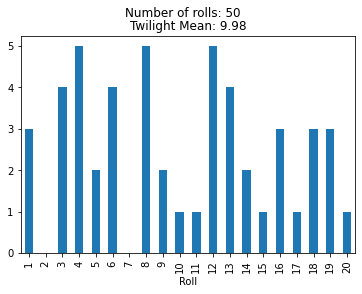

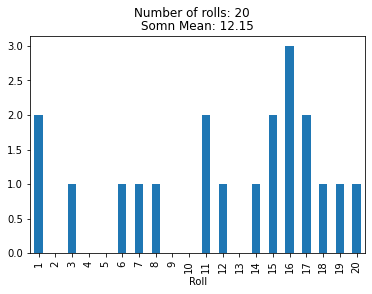

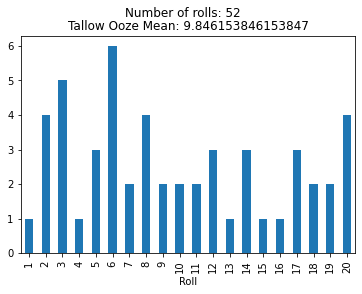

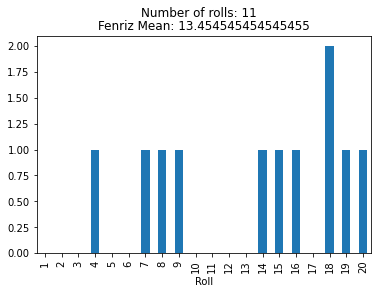

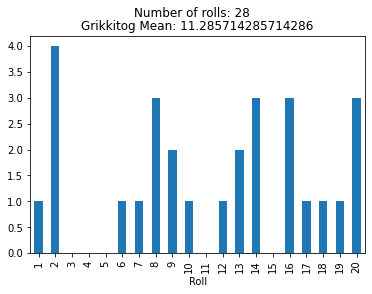

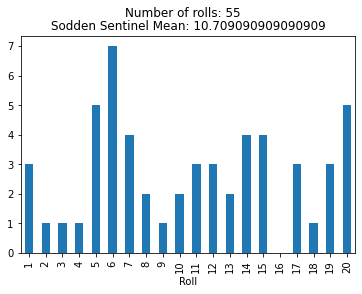

In [ ]:
summary = []
sinceWhen = datetime(2022,7,17)
x_dice = []
searchString = ""
for char in characters:
    historic = []
    x_dice = []
    rolls = pd.DataFrame(data ={"Rolls":[0]*20})
    rolls.index = rolls.index+1
    newdf = df[df["Character"] == char]
    newdf = newdf[newdf["Date"] >= sinceWhen]
    #newdf["D20 Roll"] = pd.to_numeric(newdf["D20 Roll"])
    newdf = newdf.loc[newdf['Action'].str.contains(searchString, regex=False)]
    if len(newdf.index) > 0:
        plt.figure()
        counts = newdf['D20 Roll'].value_counts()
        counts = counts.to_frame()
        counts.index = pd.to_numeric(counts.index)
        counts = counts.sort_index()
        newRolls = pd.concat([rolls, counts],axis=1)
        newRolls = newRolls.fillna(value={"D20 Roll":0})
        newRolls['D20 Roll'].plot.bar()
        plt.xlabel('Roll')
        plt.title(char + " Mean: " + str(newdf['D20 Roll'].mean()))
        plt.suptitle("Number of rolls: " + str(len(newdf.index)))
        plt.savefig(char + ".jpg", dpi=72)
        summary.append([newdf['D20 Roll'].mean(),char,len(newdf.index)])   
summary.sort()

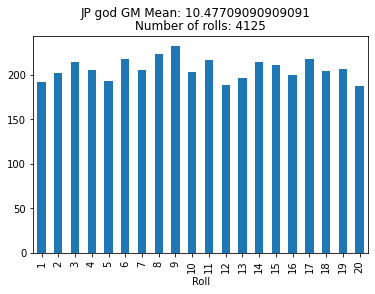

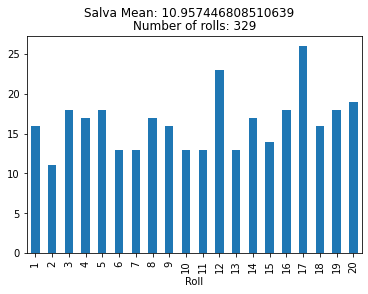

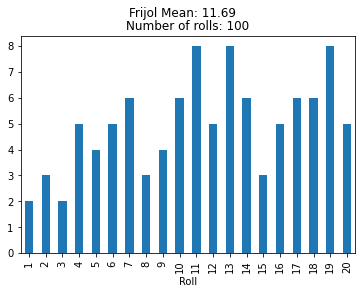

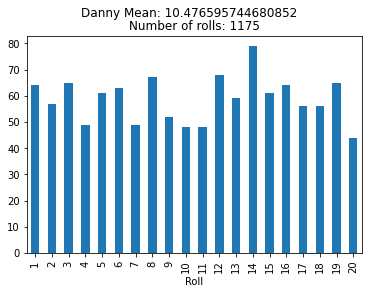

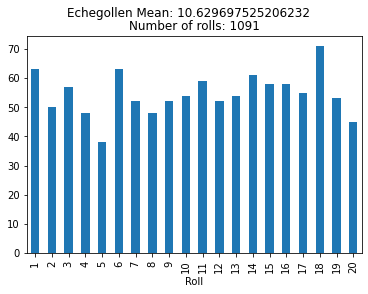

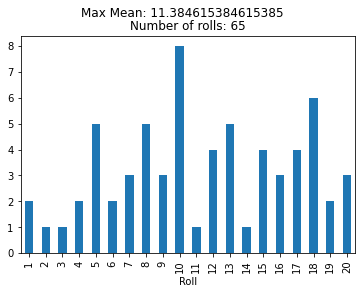

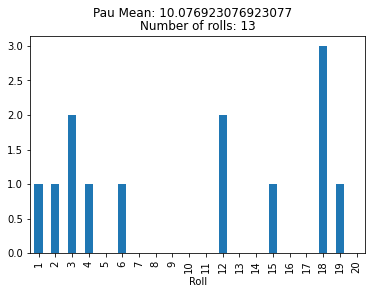

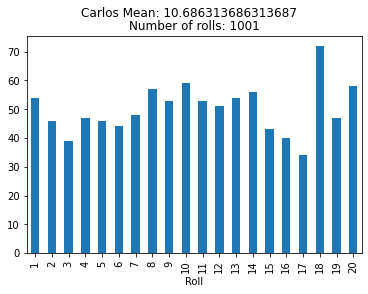

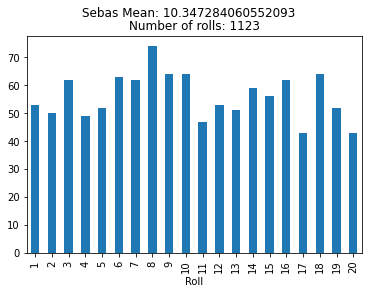

In [ ]:
summary = []
sinceWhen = datetime(2022,7,17)
x_dice = []
searchString = ""
for player in players:
    historic = []
    x_dice = []
    rolls = pd.DataFrame(data ={"Rolls":[0]*20})
    rolls.index = rolls.index+1
    newerdf = df[df["Player"] == player]
    #newdf = newdf[newdf["Date"] >= sinceWhen]
    #newerdf["D20 Roll"] = pd.to_numeric(newerdf["D20 Roll"])
    newerdf = newerdf.loc[newerdf['Action'].str.contains(searchString, regex=False)]
    if len(newerdf.index) > 0:
        plt.figure()
        counts = newerdf['D20 Roll'].value_counts()
        counts = counts.to_frame()
        counts.index = pd.to_numeric(counts.index)
        counts = counts.sort_index()
        newRolls = pd.concat([rolls, counts],axis=1)
        newRolls = newRolls.fillna(value={"D20 Roll":0})
        newRolls['D20 Roll'].plot.bar()
        plt.xlabel('Roll')
        plt.suptitle(player + " Mean: " + str(newerdf['D20 Roll'].mean()))
        plt.title("Number of rolls: " + str(len(newerdf.index)))
        plt.savefig(player + ".jpg", dpi=72)
        summary.append([newerdf['D20 Roll'].mean(),player,len(newerdf.index)])   
summary.sort()

In [ ]:
todaydf = df[df["Date"] > sinceWhen]
todaydf.to_csv("todaydf.csv")
df.to_csv("all.csv")
todaydf

,Character,Player,Roll Result,Action,D20 Roll,Date
8725,Twilight,Danny,42,Ranged Strike: Shock Thundering Shortbow,18,2022-07-18
8726,Groa,Echegollen,43,Reflex Saving Throw,18,2022-07-18
8727,Groa,Echegollen,40,"<span class=""pf2-icon"">A</span> <b>Balance</b>...",15,2022-07-18
8728,Groa,Echegollen,41,Melee Strike: Impactful Siccatite Shield Boss,15,2022-07-18
8729,Groa,Echegollen,28,Melee Strike: Impactful Siccatite Shield Boss,7,2022-07-18
...,...,...,...,...,...,...
9017,Sodden Sentinel,JP god GM,24,Reflex Saving Throw,10,2022-07-18
9018,Ros,Carlos,30,Melee Strike: Returning Flaming Darkwood Trident,9,2022-07-18
9019,Somn,Sebas,28,Occult Spell Attack,6,2022-07-18
9020,Groa,Echegollen,36,Melee Strike: Impactful Siccatite Shield Boss,10,2022-07-18


In [ ]:
summary.reverse()
summary

[[11.69, 'Frijol', 100],
 [11.384615384615385, 'Max', 65],
 [10.957446808510639, 'Salva', 329],
 [10.686313686313687, 'Carlos', 1001],
 [10.629697525206232, 'Echegollen', 1091],
 [10.47709090909091, 'JP god GM', 4125],
 [10.476595744680852, 'Danny', 1175],
 [10.347284060552093, 'Sebas', 1123],
 [10.076923076923077, 'Pau', 13]]